# Plotting Rips Complex
There is an edge between two points if their overlaps contain the centres
If a simplex can be formed, it is so that we won't have a loop of 3 edges.
I've taken random smaples of data and computed their persistentent homologies, and their corresponding diagrams.

Unless on conda, install gudhi https://gudhi.inria.fr/

/home/arkos/anaconda3/lib/python3.11/site-packages/gudhi/persistence_graphical_tools.py:112: UserWarning: usetex mode requires dvipng.
  warnings.warn("usetex mode requires dvipng.")


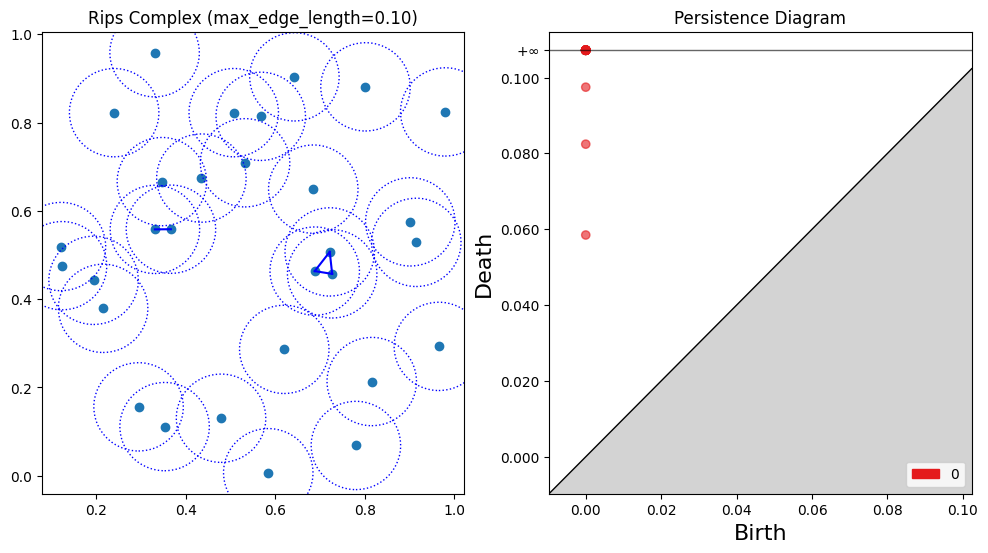

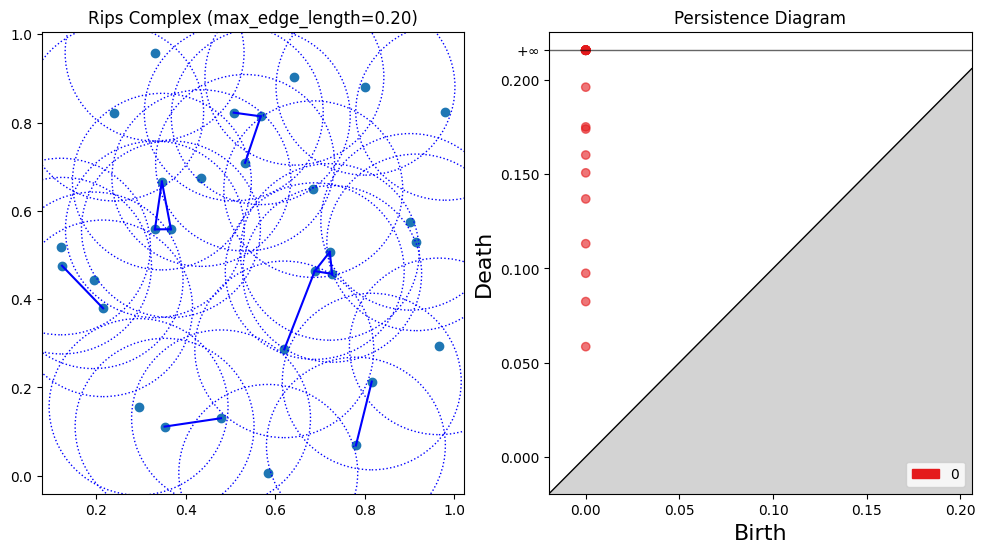

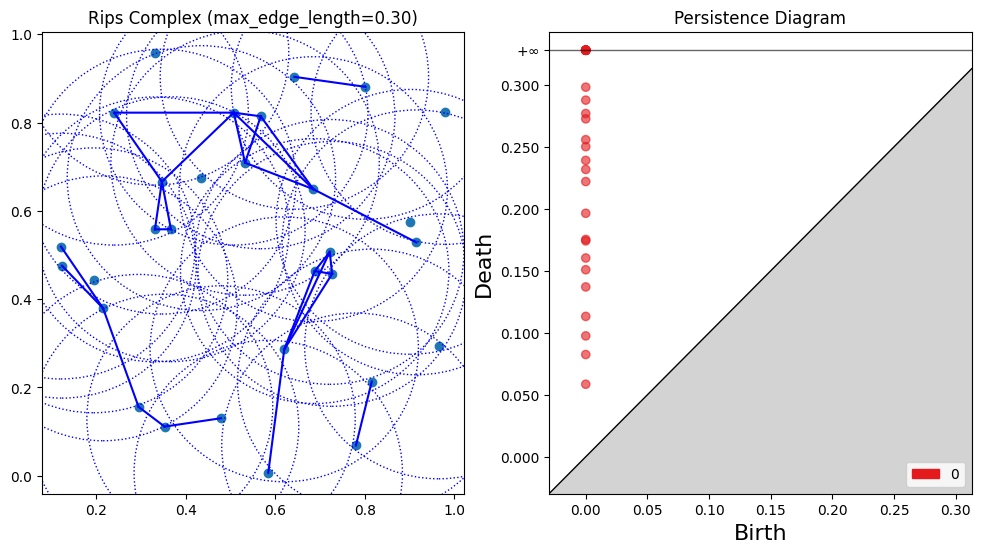

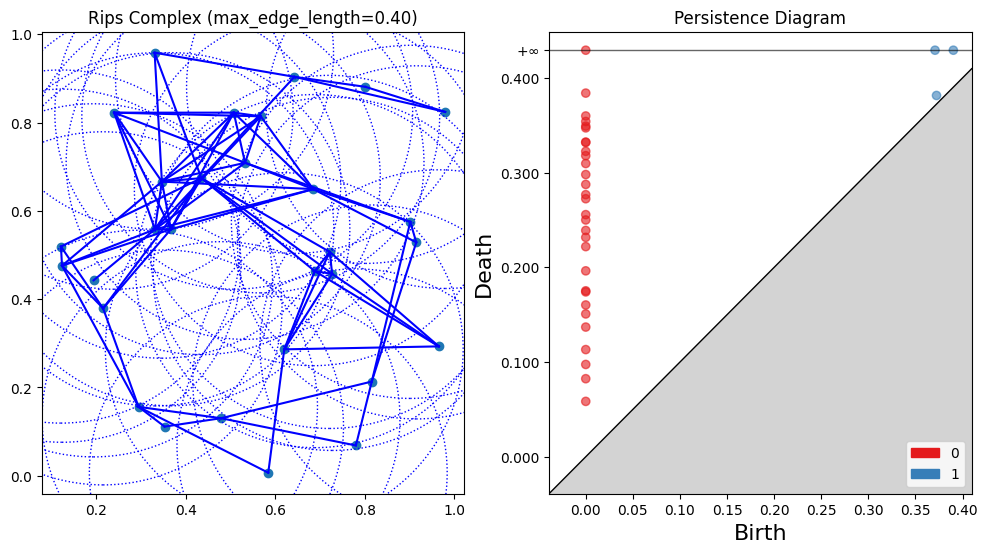

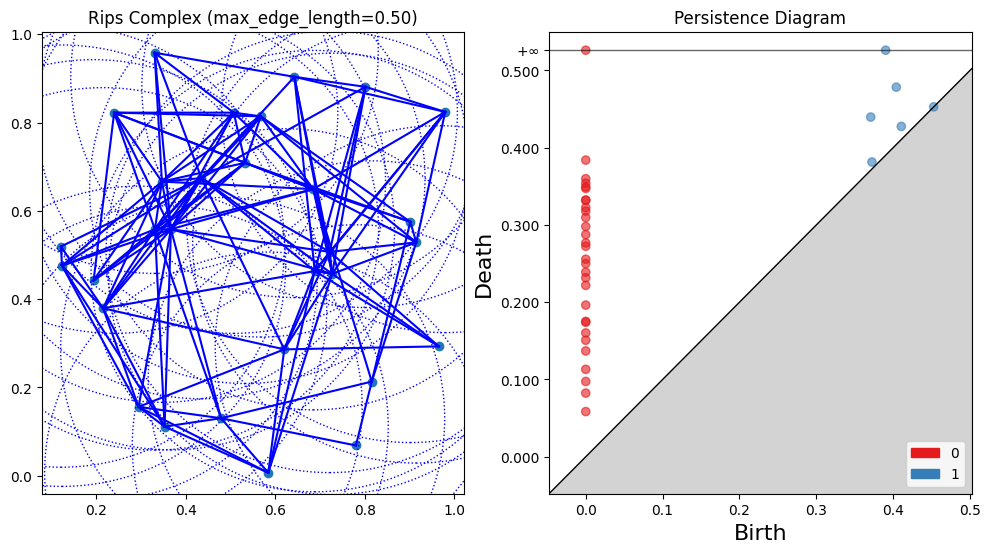

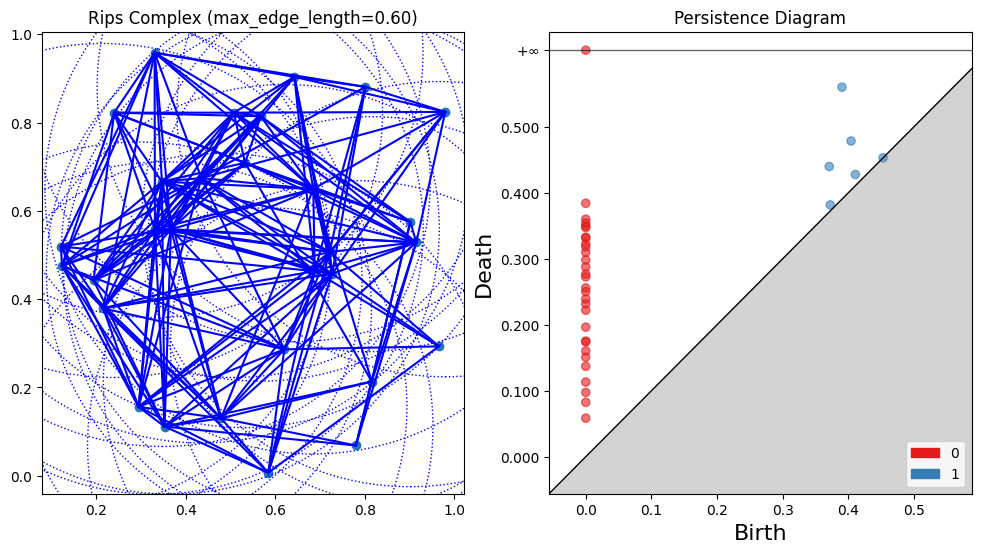

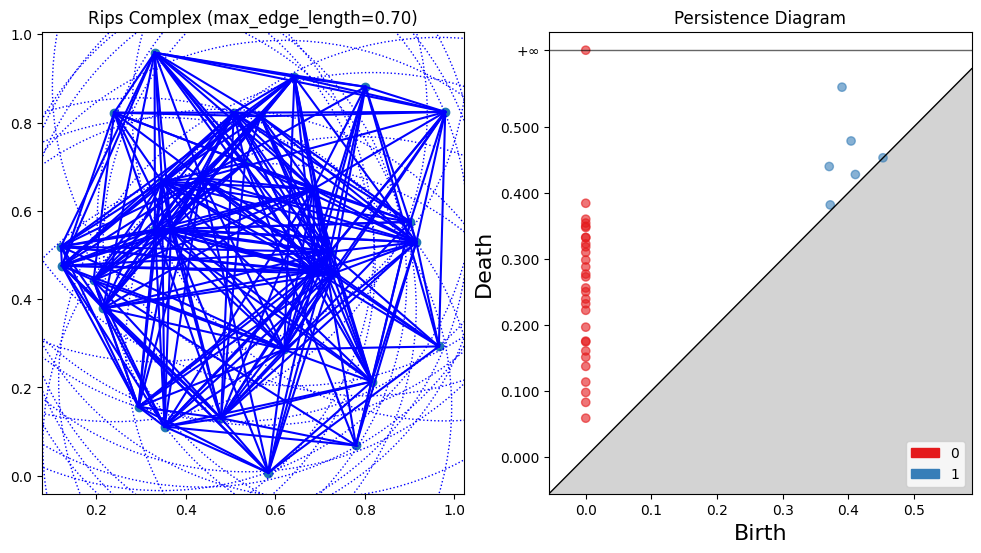

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi

# Generate some sample data
np.random.seed()
points = np.random.random((30, 3))


max_edge_length = 0.7  
step_size = 0.1  
def plot_rips_and_persistence(points, max_edge_length):
    # Create a Rips complex
    rips_complex = gudhi.RipsComplex(points=points, max_edge_length=max_edge_length)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    simplex_tree.compute_persistence()
    diag = simplex_tree.persistence()

    # Plot Rips complex
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].scatter(points[:, 0], points[:, 1])
    ax[0].set_title(f"Rips Complex (max_edge_length={max_edge_length:.2f})")

    
    for point in points:
        circle = plt.Circle(point, max_edge_length, color='b', fill=False, linestyle='dotted')
        ax[0].add_artist(circle)

   
    for simplex in simplex_tree.get_skeleton(1):
        if len(simplex[0]) == 2 and simplex[1] <= max_edge_length:
            i, j = simplex[0]
            ax[0].plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], 'b-')

    # Plot persistence diagram
    gudhi.plot_persistence_diagram(diag, axes=ax[1])
    ax[1].set_title("Persistence Diagram")
    plt.show()


current_edge_length = step_size
while current_edge_length <= max_edge_length:
    plot_rips_and_persistence(points, current_edge_length)
    current_edge_length += step_size


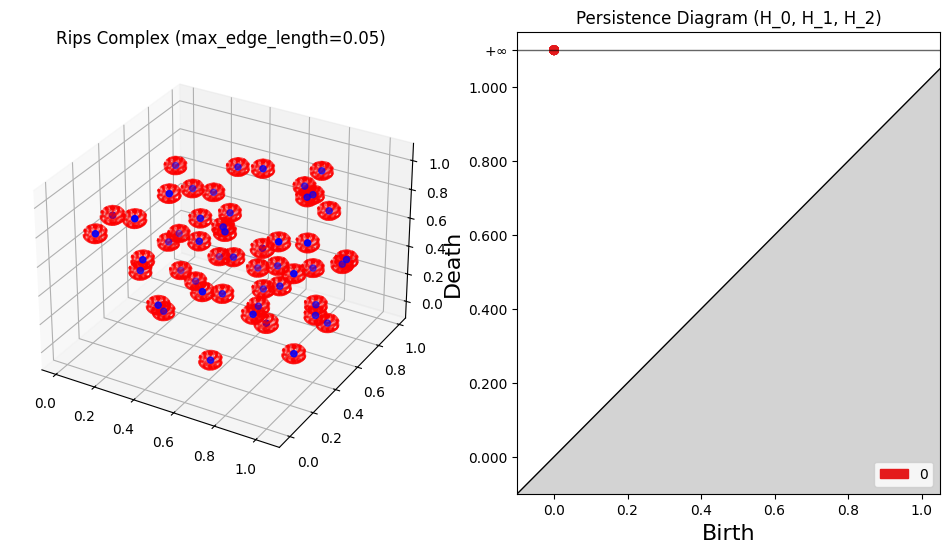

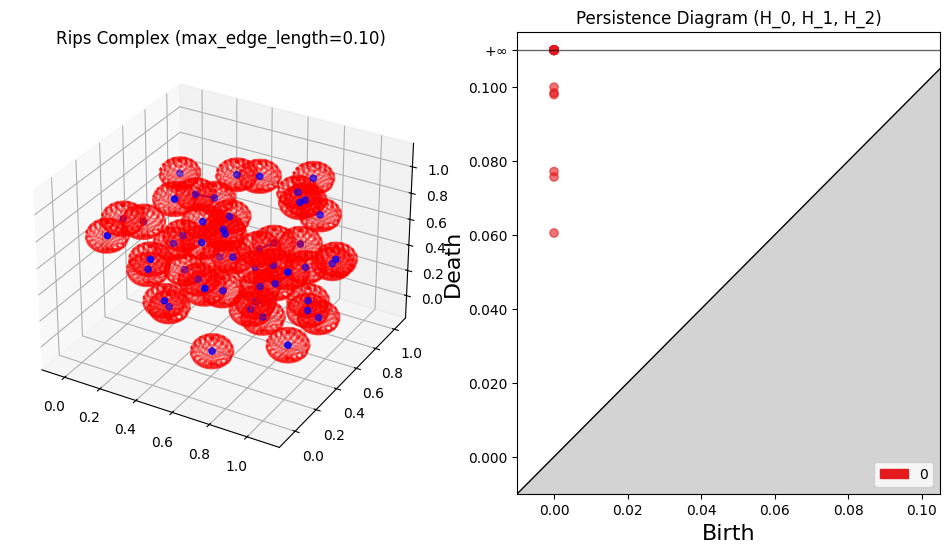

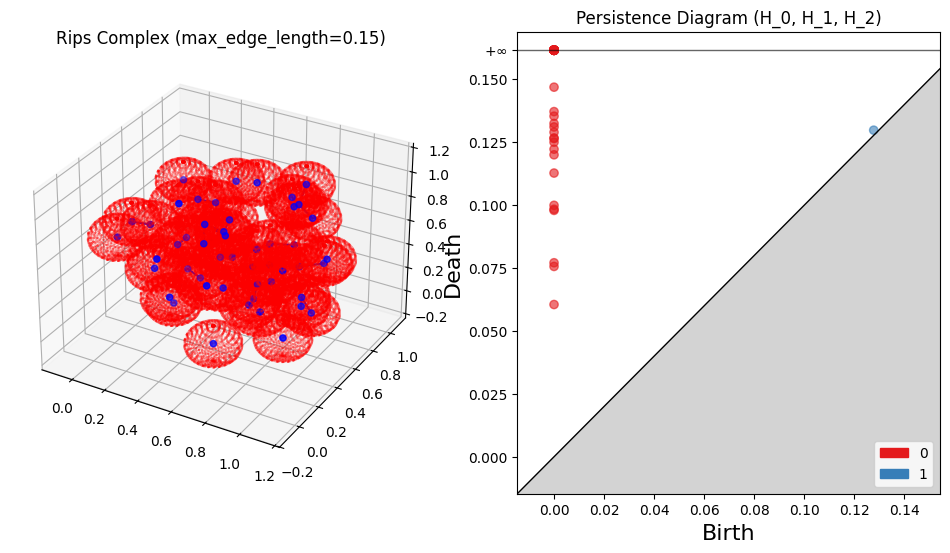

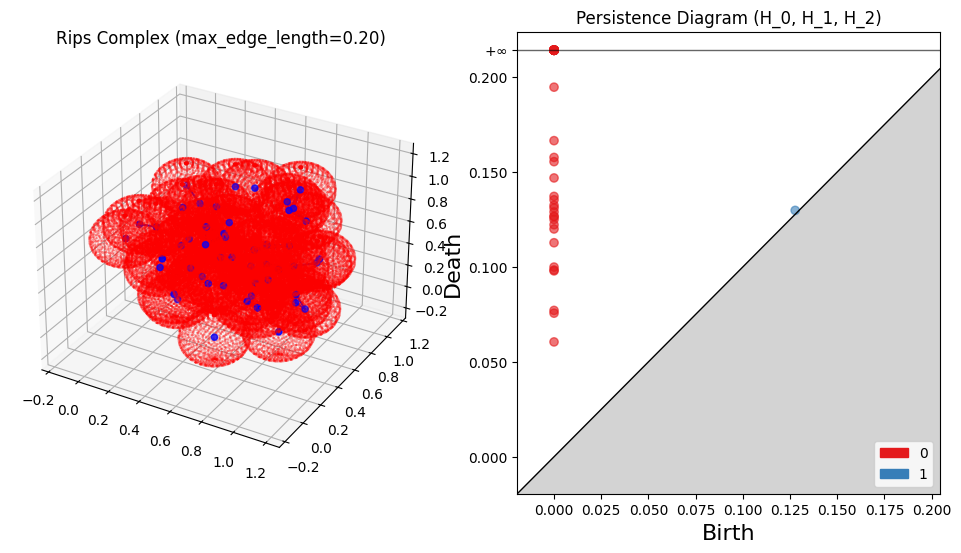

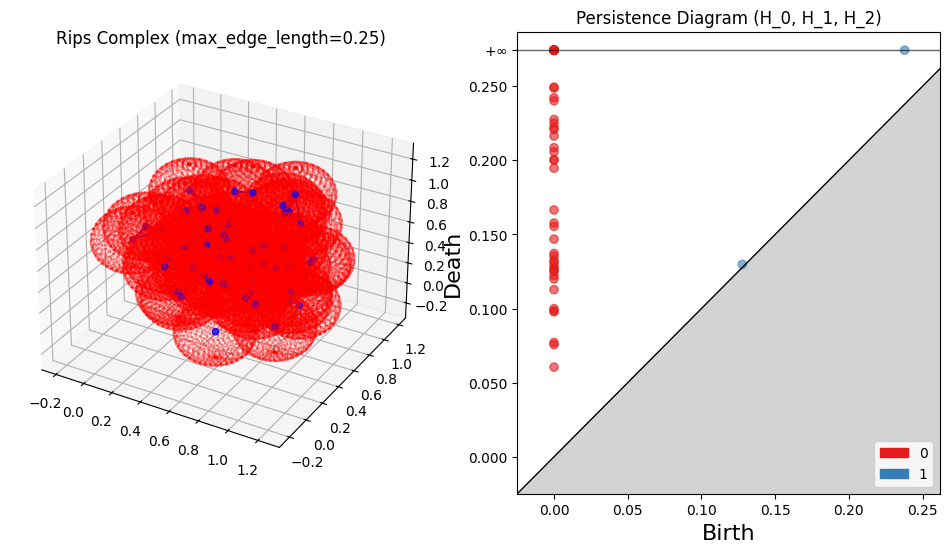

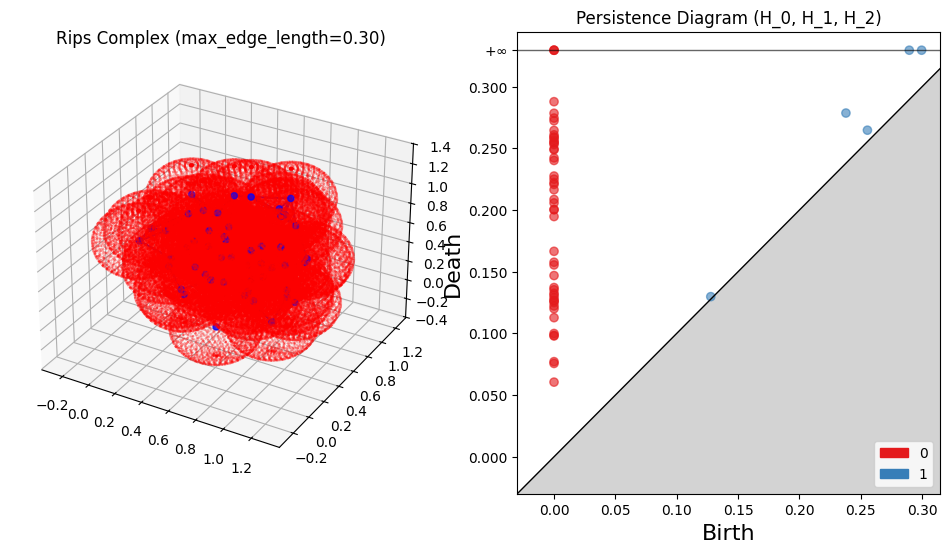

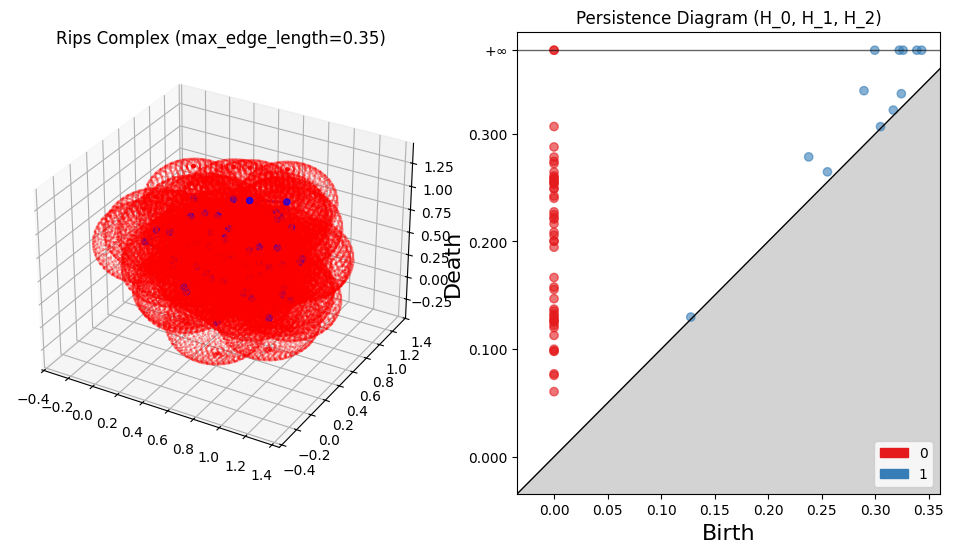

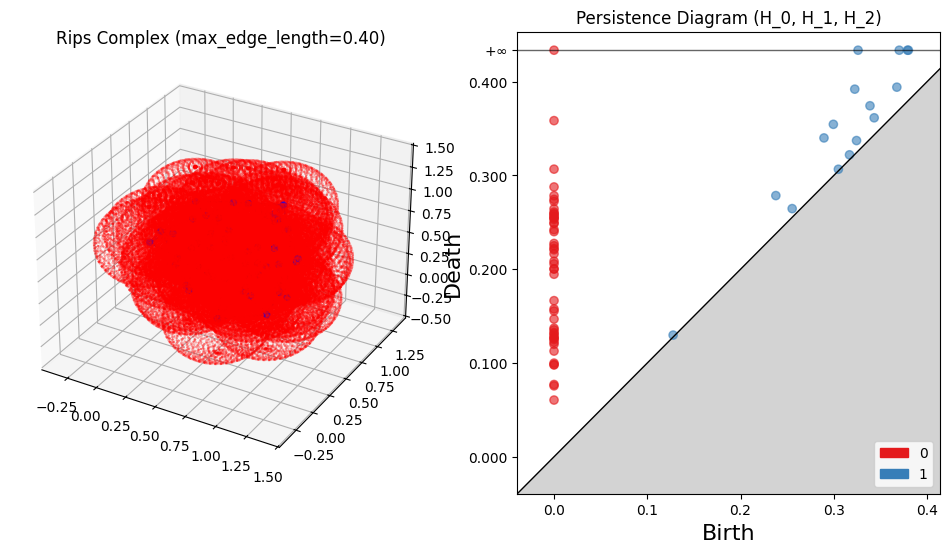

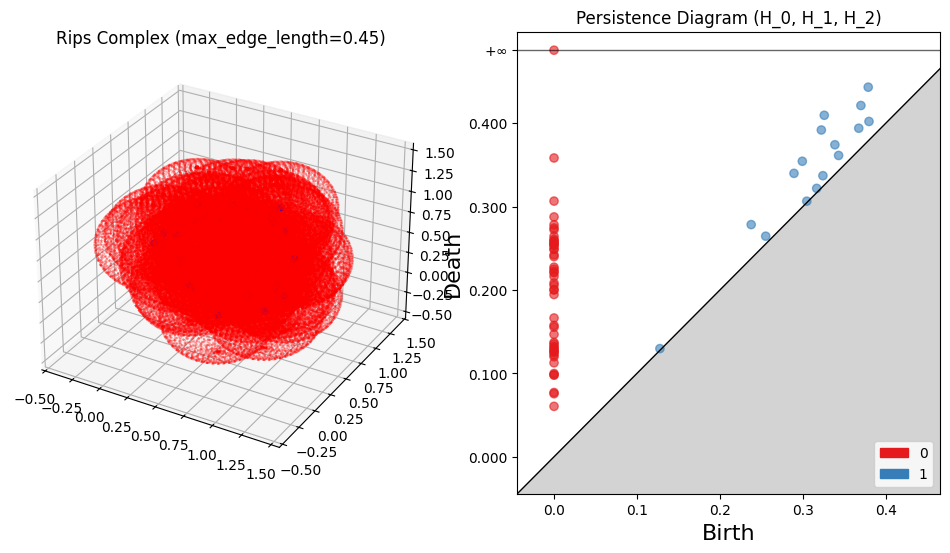

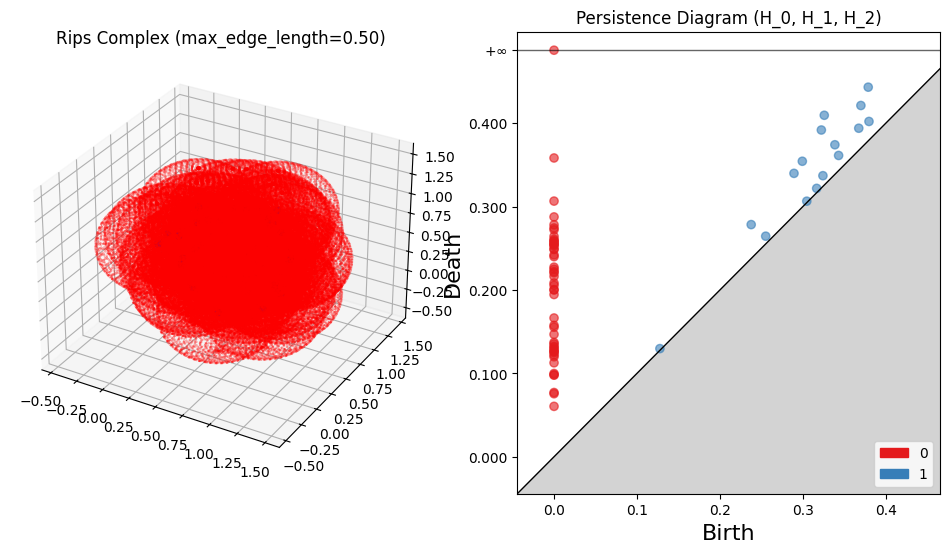

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi

# Generate some sample data in 3D
np.random.seed()
points = np.random.random((50, 3))

# Parameters for the simulation
max_edge_length = 0.5  # maximum edge length to consider
step_size = 0.05  # step size for the scale parameter

# Function to plot Rips complex and persistence diagram
def plot_rips_and_persistence(points, current_edge_length):
    # Create a Rips complex
    rips_complex = gudhi.RipsComplex(points=points, max_edge_length=current_edge_length)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    simplex_tree.compute_persistence()

    # Compute persistence intervals for all dimensions
    diag = simplex_tree.persistence()

    # Plot Rips complex
    fig = plt.figure(figsize=(12, 6))

    # 3D plot for Rips complex
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')
    ax.set_title(f"Rips Complex (max_edge_length={current_edge_length:.2f})")

    # Plot balls around points
    for point in points:
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        x = current_edge_length * np.outer(np.cos(u), np.sin(v)) + point[0]
        y = current_edge_length * np.outer(np.sin(u), np.sin(v)) + point[1]
        z = current_edge_length * np.outer(np.ones(np.size(u)), np.cos(v)) + point[2]
        ax.plot_wireframe(x, y, z, color='r', alpha=0.3, linestyle='dotted')

    # Plot edges of the Rips complex
    for simplex in simplex_tree.get_skeleton(1):
        if len(simplex[0]) == 2 and simplex[1] <= current_edge_length:
            i, j = simplex[0]
            ax.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], [points[i, 2], points[j, 2]], 'b-')

    # Plot persistence diagram for H_0, H_1, and H_2
    ax2 = fig.add_subplot(122)
    gudhi.plot_persistence_diagram(diag, axes=ax2)
    ax2.set_title("Persistence Diagram (H_0, H_1, H_2)")

    plt.show()

# Simulation loop
current_edge_length = step_size
while current_edge_length <= max_edge_length:
    plot_rips_and_persistence(points, current_edge_length)
    current_edge_length += step_size


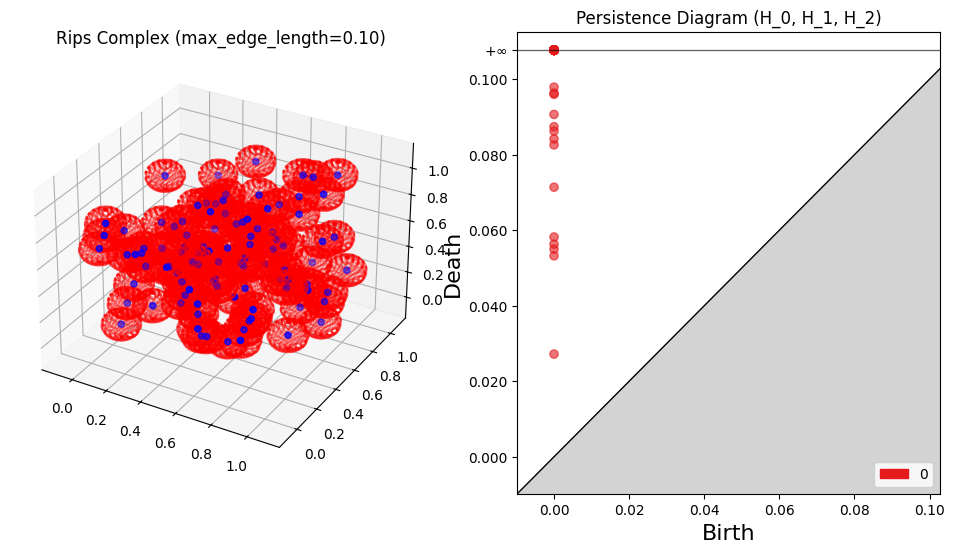

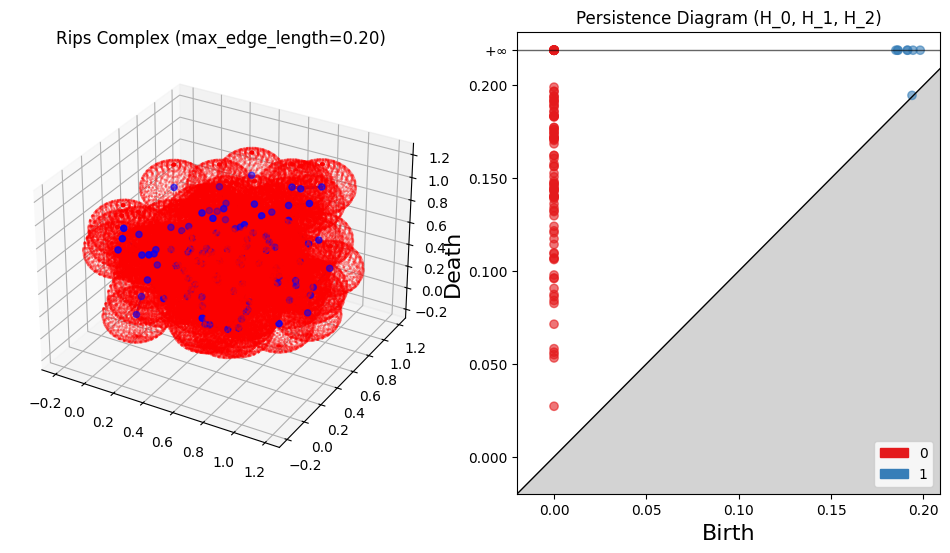

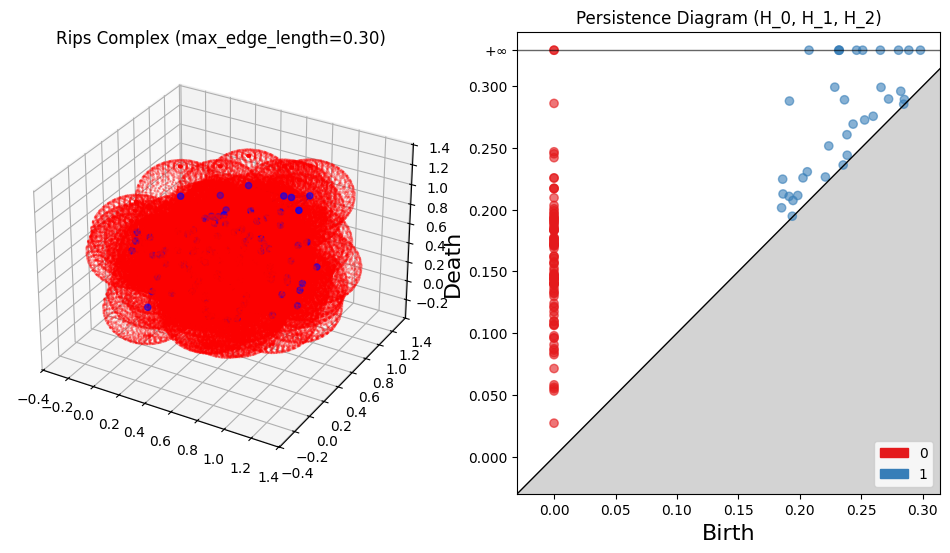

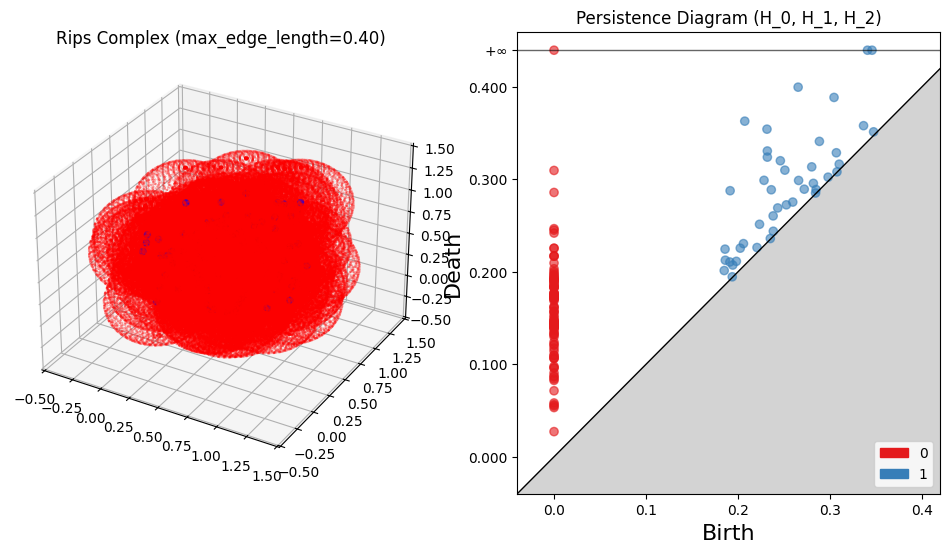

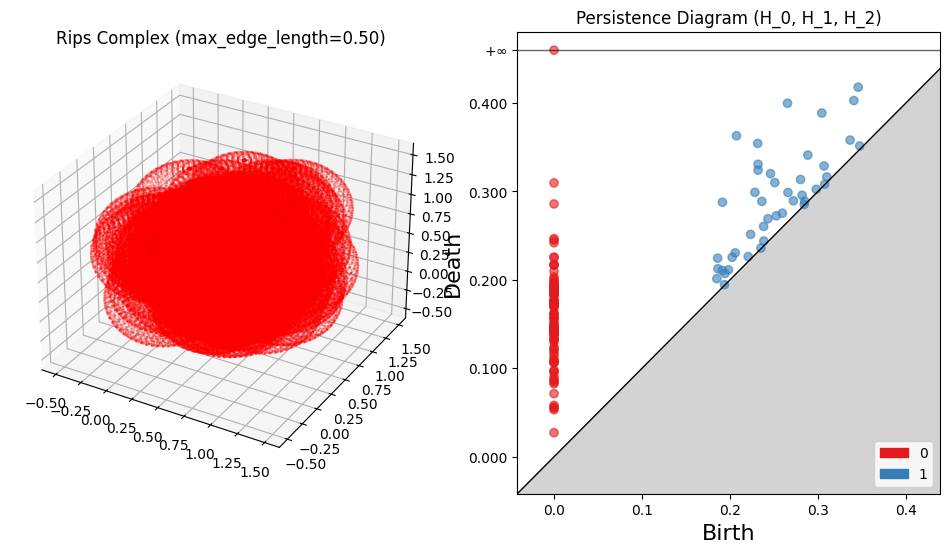

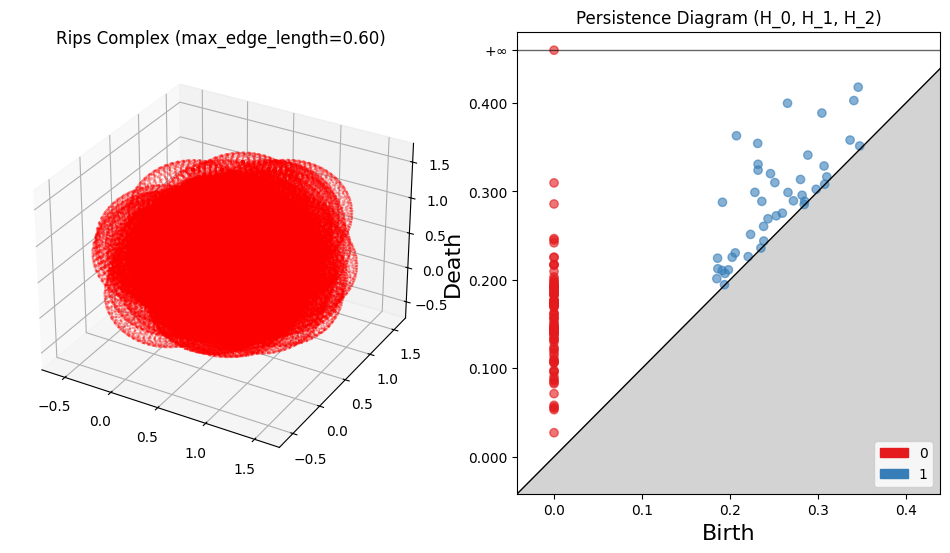

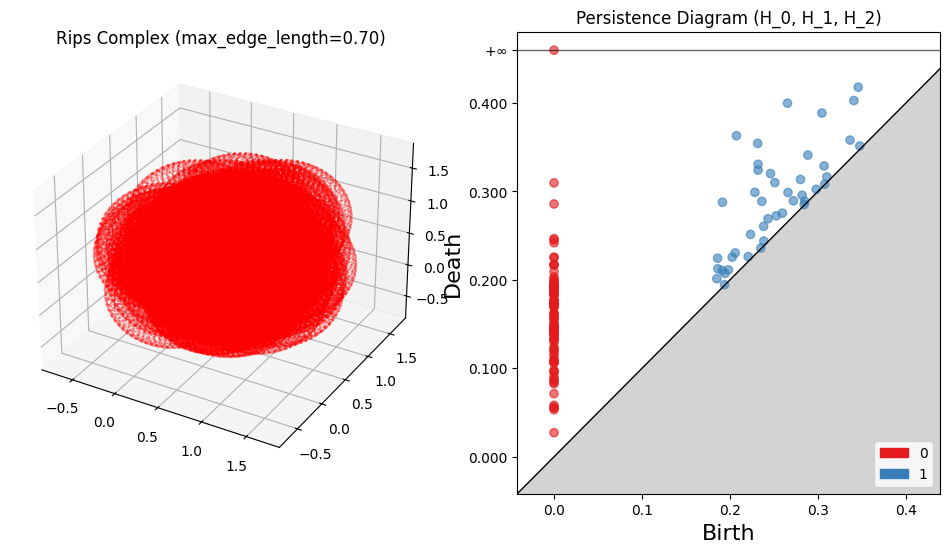

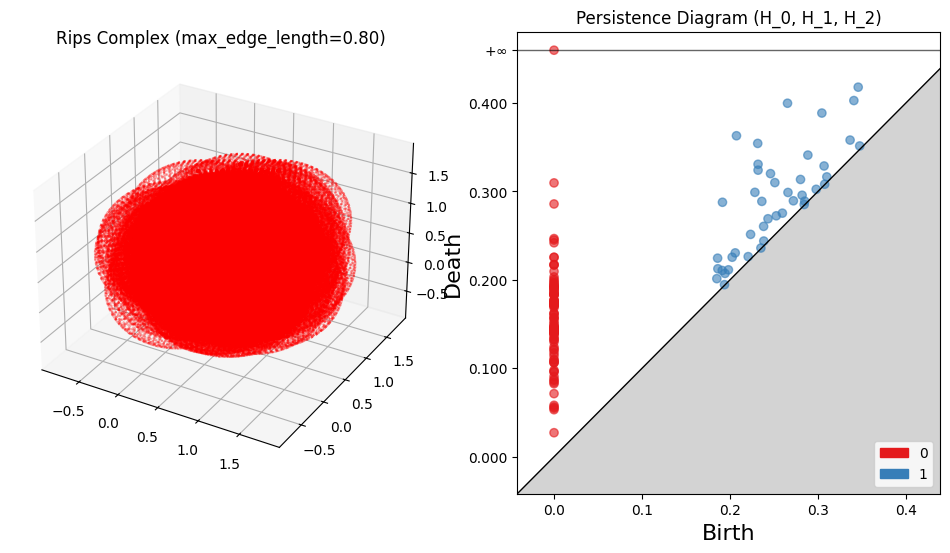

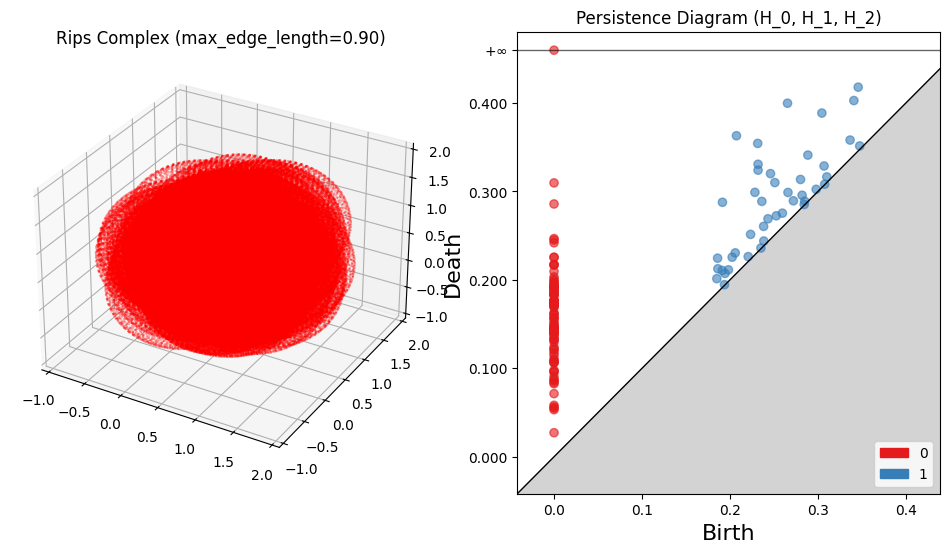

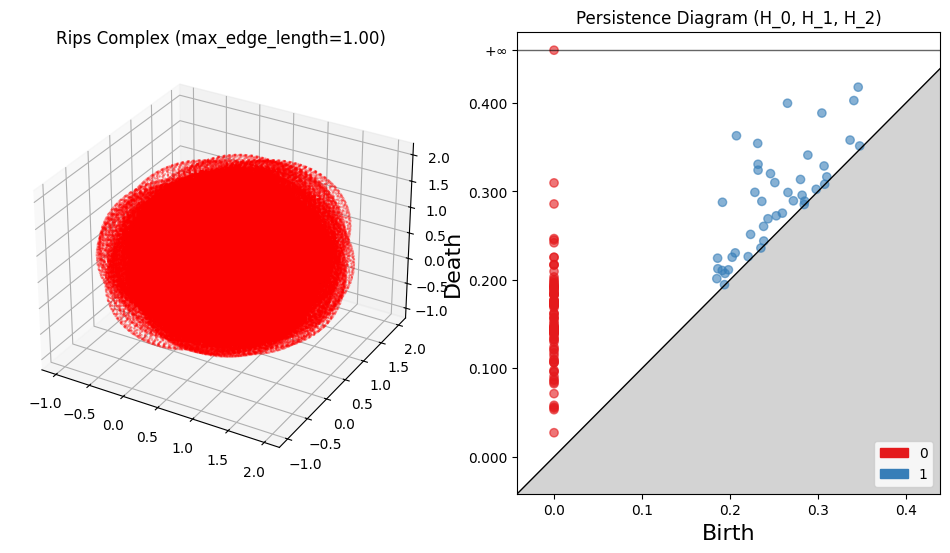

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi

# Generate a denser sample data in 3D
np.random.seed()
points = np.random.random((100, 3))

# Parameters for the simulation
max_edge_length = 1.0  # increased maximum edge length to consider
step_size = 0.1  # step size for the scale parameter

# Function to plot Rips complex and persistence diagram
def plot_rips_and_persistence(points, current_edge_length):
    # Create a Rips complex
    rips_complex = gudhi.RipsComplex(points=points, max_edge_length=current_edge_length)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    simplex_tree.compute_persistence()

    # Compute persistence intervals for all dimensions
    diag = simplex_tree.persistence()

    # Plot Rips complex
    fig = plt.figure(figsize=(12, 6))

    # 3D plot for Rips complex
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')
    ax.set_title(f"Rips Complex (max_edge_length={current_edge_length:.2f})")

    # Plot balls around points
    for point in points:
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        x = current_edge_length * np.outer(np.cos(u), np.sin(v)) + point[0]
        y = current_edge_length * np.outer(np.sin(u), np.sin(v)) + point[1]
        z = current_edge_length * np.outer(np.ones(np.size(u)), np.cos(v)) + point[2]
        ax.plot_wireframe(x, y, z, color='r', alpha=0.3, linestyle='dotted')

    # Plot edges of the Rips complex
    for simplex in simplex_tree.get_skeleton(1):
        if len(simplex[0]) == 2 and simplex[1] <= current_edge_length:
            i, j = simplex[0]
            ax.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], [points[i, 2], points[j, 2]], 'b-')

    # Plot persistence diagram for H_0, H_1, and H_2
    ax2 = fig.add_subplot(122)
    gudhi.plot_persistence_diagram(diag, axes=ax2)
    ax2.set_title("Persistence Diagram (H_0, H_1, H_2)")

    plt.show()

# Simulation loop
current_edge_length = step_size
while current_edge_length <= max_edge_length:
    plot_rips_and_persistence(points, current_edge_length)
    current_edge_length += step_size


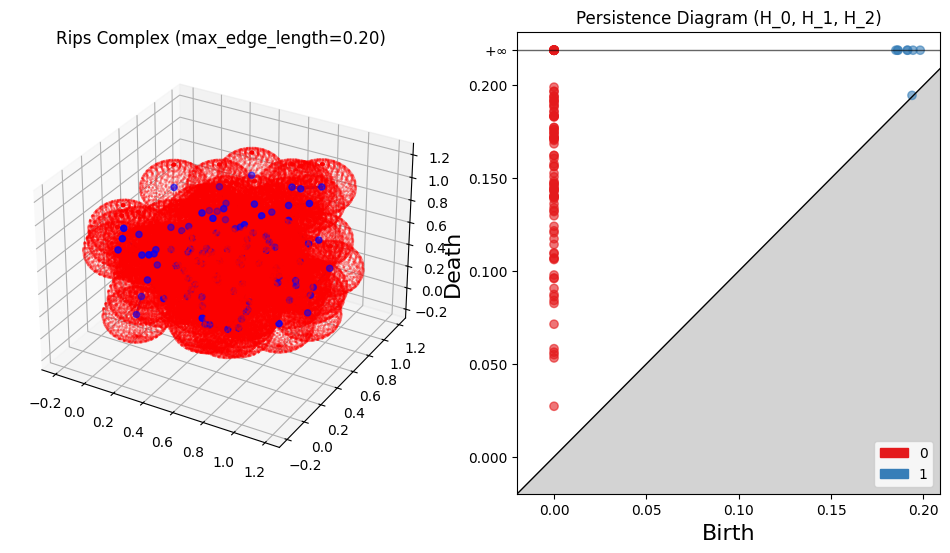

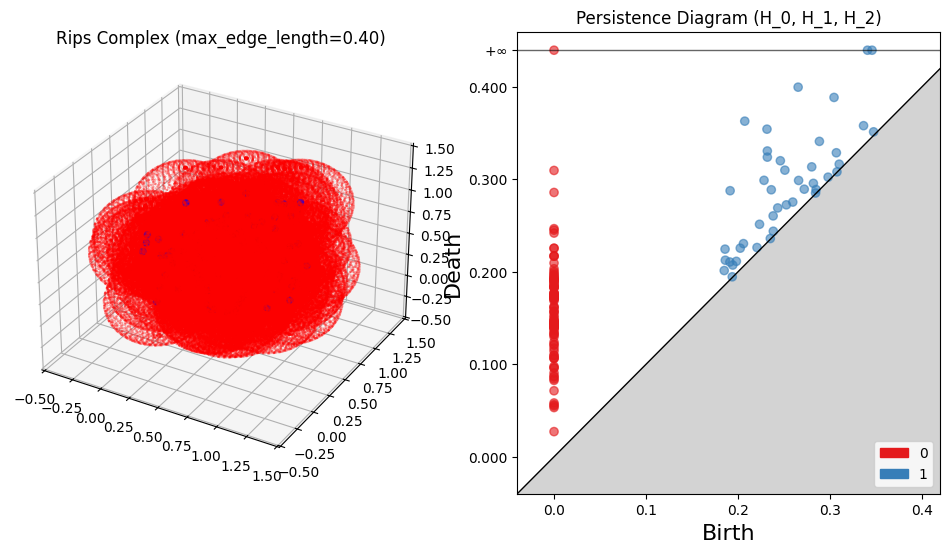

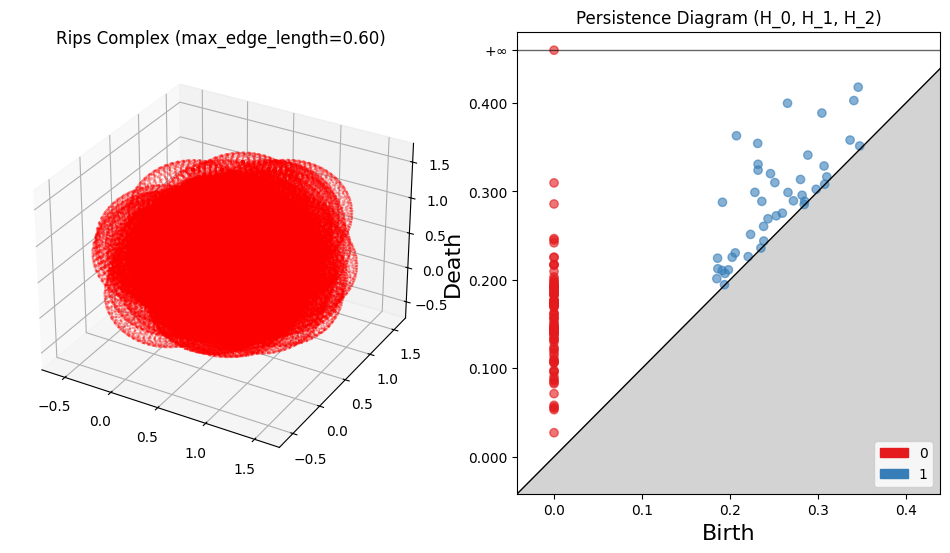

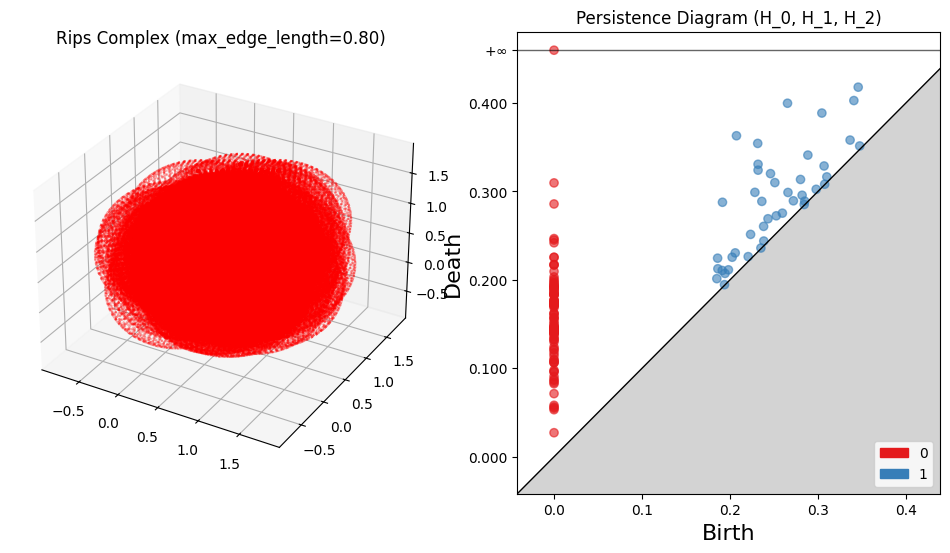

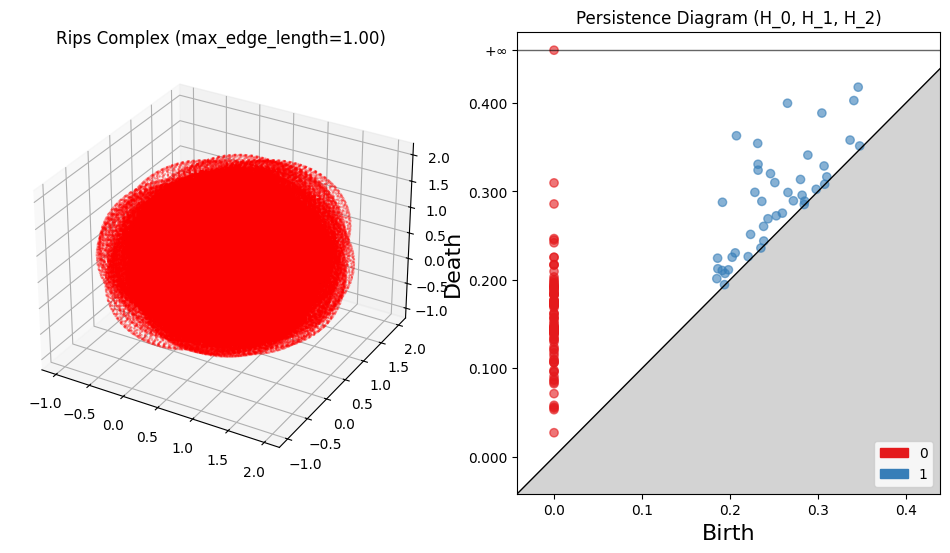

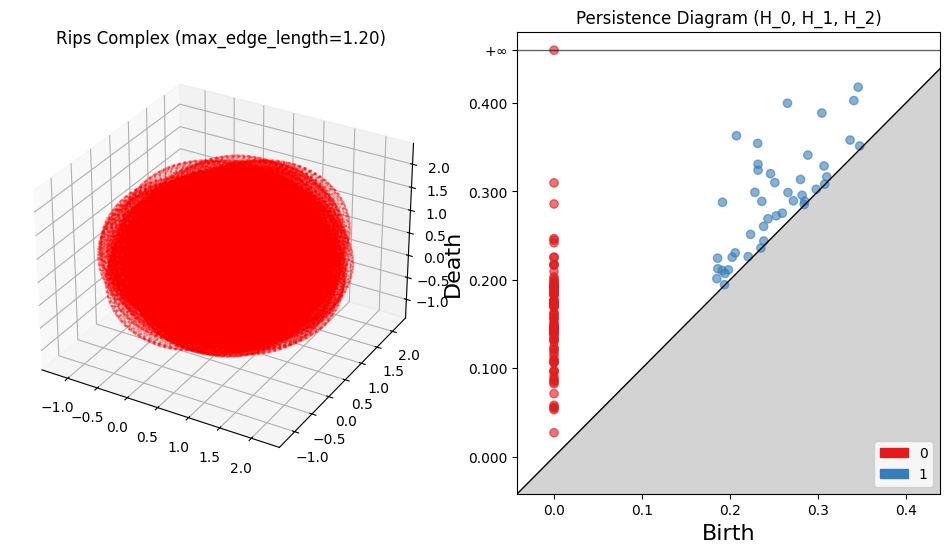

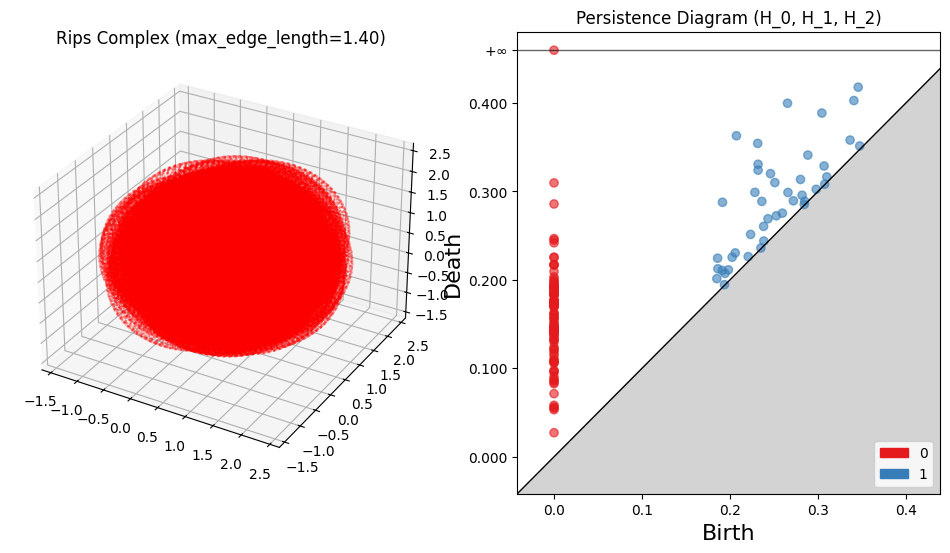

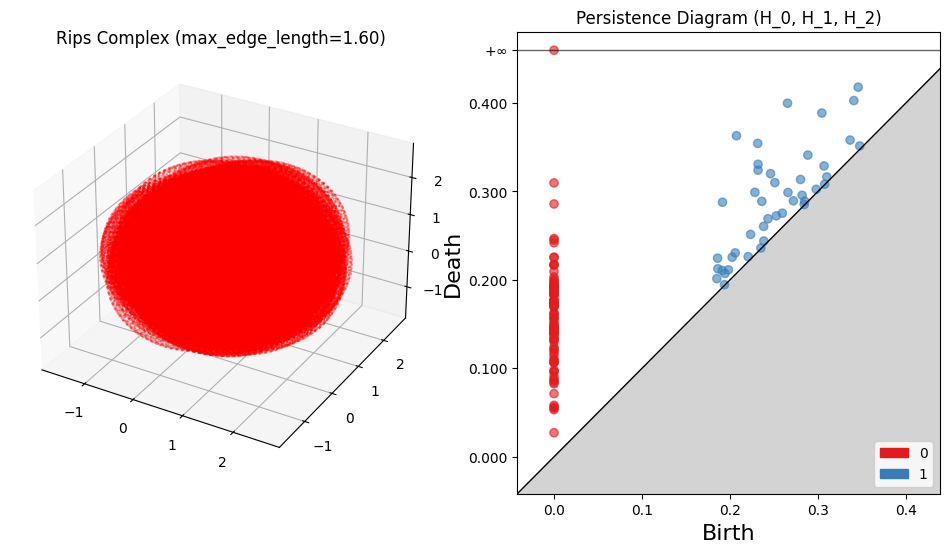

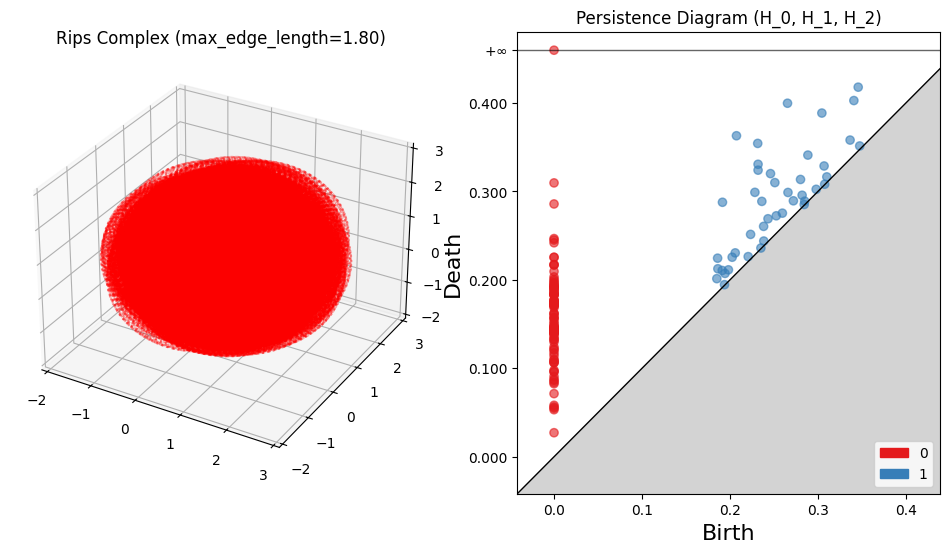

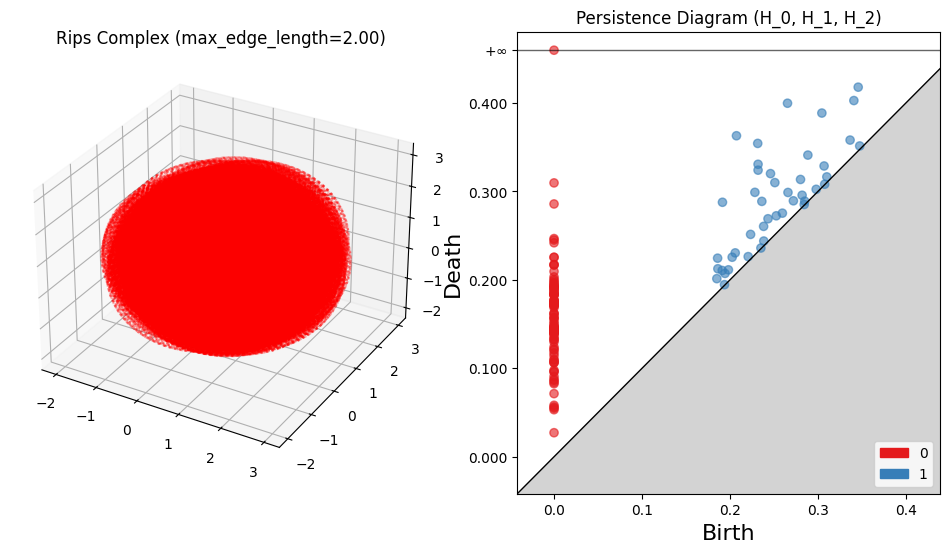

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi

# Generate a denser sample data in 3D
np.random.seed(0)
points = np.random.random((100, 3))

# Parameters for the simulation
max_edge_length = 2.0  # increased maximum edge length to consider
step_size = 0.2  # step size for the scale parameter

# Function to plot Rips complex and persistence diagram
def plot_rips_and_persistence(points, current_edge_length):
    # Create a Rips complex
    rips_complex = gudhi.RipsComplex(points=points, max_edge_length=current_edge_length)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    simplex_tree.compute_persistence()

    # Compute persistence intervals for all dimensions
    diag = simplex_tree.persistence()

    # Plot Rips complex
    fig = plt.figure(figsize=(12, 6))

    # 3D plot for Rips complex
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')
    ax.set_title(f"Rips Complex (max_edge_length={current_edge_length:.2f})")

    # Plot balls around points
    for point in points:
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        x = current_edge_length * np.outer(np.cos(u), np.sin(v)) + point[0]
        y = current_edge_length * np.outer(np.sin(u), np.sin(v)) + point[1]
        z = current_edge_length * np.outer(np.ones(np.size(u)), np.cos(v)) + point[2]
        ax.plot_wireframe(x, y, z, color='r', alpha=0.3, linestyle='dotted')

    # Plot edges of the Rips complex
    for simplex in simplex_tree.get_skeleton(1):
        if len(simplex[0]) == 2 and simplex[1] <= current_edge_length:
            i, j = simplex[0]
            ax.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], [points[i, 2], points[j, 2]], 'b-')

    # Plot persistence diagram for H_0, H_1, and H_2
    ax2 = fig.add_subplot(122)
    gudhi.plot_persistence_diagram(diag, axes=ax2)
    ax2.set_title("Persistence Diagram (H_0, H_1, H_2)")

    plt.show()

# Simulation loop
current_edge_length = step_size
while current_edge_length <= max_edge_length:
    plot_rips_and_persistence(points, current_edge_length)
    current_edge_length += step_size
